# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [34]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Imports for ploting and graphic representation
import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [35]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [36]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# Here I go for a big spenden on more 'durable' food/goods
indices = data[(data['Detergents_Paper'] > 3922) & (data['Grocery'] > 10655.75) & (data['Frozen'] > 3554.25) &
              (data['Fresh'] < 3127.75)].index
ind_temp = []
ind_temp.append(indices[0])

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Investigation of spenders mostly eating at home on the more durable food side:")
display(samples)


# I try to find big spender
indices = data[(data['Fresh'] > 16933.75) & (data['Delicatessen'] > 1820.25) & (data['Frozen'] < 742.25)].index
ind_temp.append(indices[1])

samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Investigation of 'gourmans' eating fresh food and eating out:")
display(samples)

indices = data[(data['Fresh'] > 16933.75) & (data['Delicatessen'] > 1820.25) & (data['Milk'] > 7190.25) &
               (data['Grocery'] > 10655.7) & (data['Frozen'] > 3554.25) & (data['Detergents_Paper'] > 3922) &
               (data['Delicatessen'] > 1820.25)].index

ind_temp.append(indices[0])

samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Investigaton of the biggest spenders in all categories:")
display(samples)

samples = pd.DataFrame(data.loc[ind_temp], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Investigation of spenders mostly eating at home on the more durable food side:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3067,13240,23127,3941,9959,731


Investigation of 'gourmans' eating fresh food and eating out:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,24653,9465,12091,294,5058,2168
2,22039,8384,34792,42,12591,4430


Investigaton of the biggest spenders in all categories:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,44466,54259,55571,7782,24171,6465
2,112151,29627,18148,16745,4948,8550


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3067,13240,23127,3941,9959,731
1,24653,9465,12091,294,5058,2168
2,26373,36423,22019,5154,4337,16523


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3067,13240,23127,3941,9959,731
1,24653,9465,12091,294,5058,2168
2,26373,36423,22019,5154,4337,16523


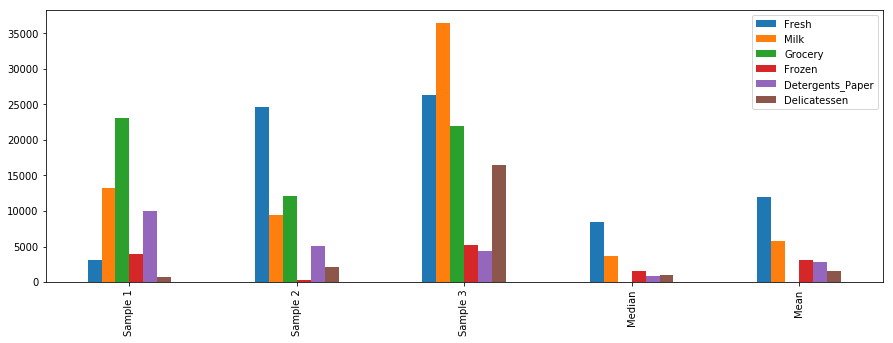

In [74]:
display(samples)

samples_for_plot = samples.copy()
samples_for_plot.loc[3] = data.median()
samples_for_plot.loc[4] = data.mean()

labels = ['Sample 1', 'Sample 2', 'Sample 3', 'Median', 'Mean']
samples_for_plot.plot(kind='bar', figsize=(15, 5))
plt.xticks(range(5), labels)
plt.show()

**Answer:** 
I have choosen following sample.
1st customer is in Milk Grocery Detergents_Paper and highly above average. I think that dataset represents under frozen cheaper fast-food. In delicatessen this consumer is strongly below average as well as in category fresh. I think he is seeking greatest value for money (as much food as he can get). It could be shopping for bigger family on the budget or someone who wants to eat a lot.

2nd consumer spends lost o money on higher quality food as fresh food and delicatessen. It seems that this customer avoids frozen food typical for fast-food. I think he is focused on healthy diet and consumes lots of vegetables and fruits. He also spends above average amount on groceries which indicates that he is probably buying higher quality food.

3rd this is great consumer with very high consumption in all categories. I think it is wealthy consumer who buys high quality in all the categories - and probably does shopping for more people/bigger family. It is harder to identify pattern here since he spends a lot on fresh food (more expensive restaurant) as well as frozen food (fast food). He spends far above average on groceries as well. I think it most probably represents wealthier family - that eats out regularly in more expensive restaurants as well as in fast foods.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [73]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
for feature in data.keys():
    new_data = data.drop(columns=[feature])

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=12)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=34)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # from sklearn.metrics import accuracy_score

    score = r2_score(y_test, regressor.predict(X_test))

    print('Predicted feature {}, R^2 score {}'.format(feature, score))

Predicted feature Fresh, R^2 score -0.387879456775
Predicted feature Milk, R^2 score -0.0500577098153
Predicted feature Frozen, R^2 score -1.04803423076
Predicted feature Detergents_Paper, R^2 score 0.366733277443
Predicted feature Delicatessen, R^2 score -0.487227392002


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
I tried all the features since we have very few.

Only features that had positive R^2 scores were Milk, Grocery and Dtergents_Paper.

The highest R^2 score had Grocery. I think this feature - the amount that is spent on groceries is simply function of all the rest of the features. People spend on groceries some amount of their total spending.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/home/martin/virtualenvs/uda_cust2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


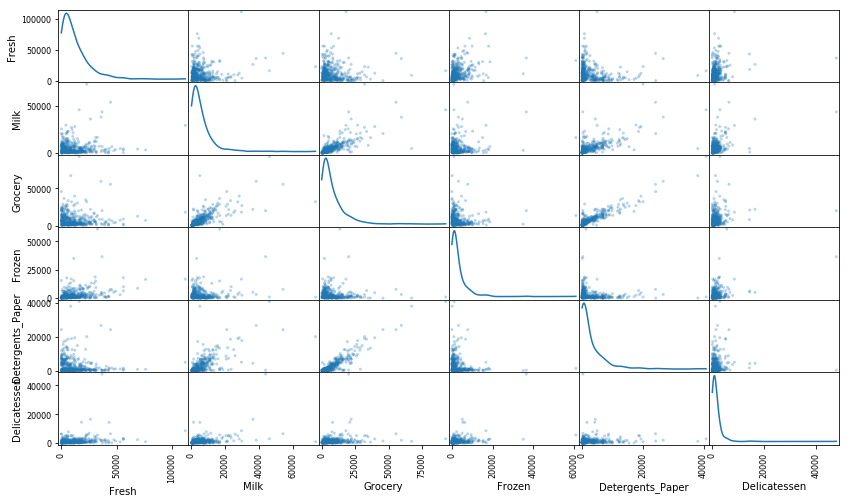

In [39]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


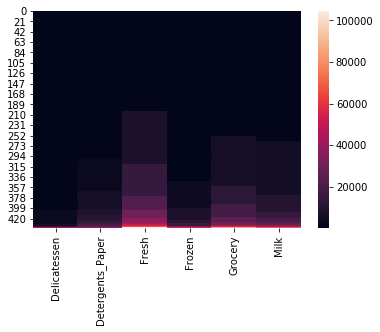

In [40]:
cols = data.columns

display(data.corr())

# heat = sns.load_dataset(data[['Detergents_Paper', 'Grocery']])
# print(type(data))
dt = {}
for col in cols:
    itm = np.histogram(data[col], bins=15)
    # print(itm)
    dt[col] = []
    for k, v in zip(itm[0], itm[1]):
        dt[col] += [v]*k
# display(dt[:5])
dt = pd.DataFrame.from_dict(dt)
sns.heatmap(dt)
# sns.heatmap(heat)

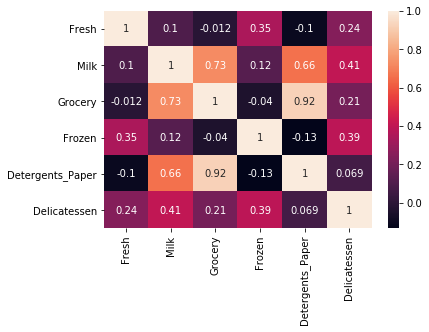

In [41]:
sns.heatmap(data.corr(), annot=True)

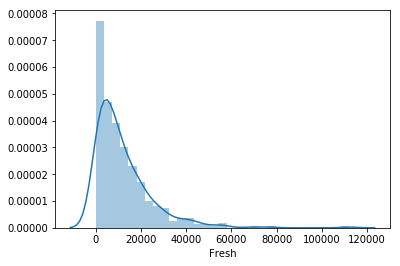

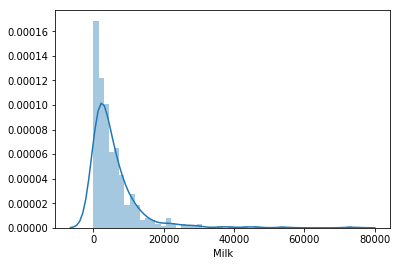

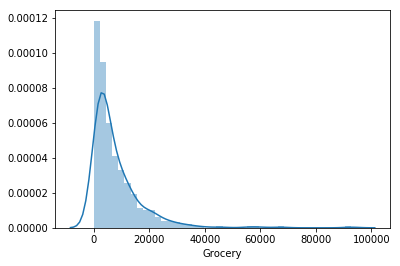

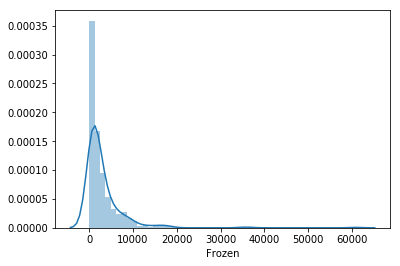

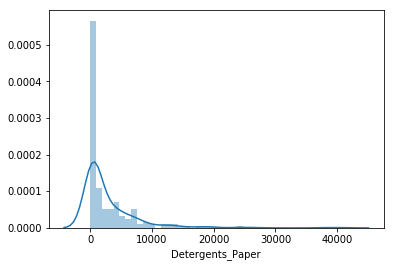

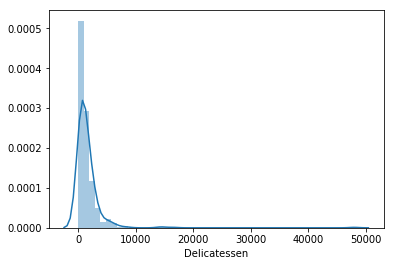

In [42]:
for col in cols:
    fig, axes = plt.subplots(1)
    axes = sns.distplot(data[col])

In [43]:
float(len(data[data['Fresh'] < 60000]))/len(data['Fresh'])

0.9931818181818182

**Answer:**
We can see from the data that there is huge correlation between Grocery and Detergents_Paper 0.924641.

We can predict Grocery from Detergents_Paper or vice versa quite reliably.

Most of the data is clustered around 0 point. That means most of the customers spend close to 0 on any product category. This is not normal distribution. But it looks like half-normal distribution for all the features.

Our data contains some outliers, where most of the data is distributed towards left-side of the distribution graph. It seems that we can capture 99% of data by splitting spending interval by half.
Feature that is most evenly distributed is Fresh. X-axis represents spending and we can see that even cutting it to half from maximum 120,000 to 60,000 we capture 99% of the population.

Based on this I have decided to remove this feature from our dataset.

In [44]:
data = data.drop(columns=['Grocery'])

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/home/martin/virtualenvs/uda_cust2/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if sys.path[0] == '':


       Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0   8.028455   9.490998  10.048756  8.279190          9.206232      6.594413
1  10.112654   9.155356   9.400217  5.683580          8.528726      7.681560
2  10.180096  10.502956   9.999661  8.547528          8.374938      9.712509


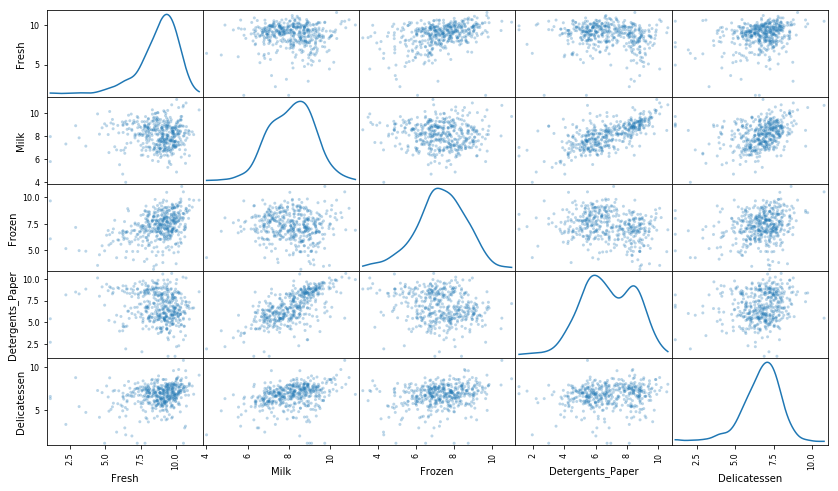

In [45]:
# import scipy

# TODO: Scale the data using the natural logarithm
# print(scipy.stats.boxcox(data))
log_data = np.log(data)
# log_data = data.apply(lambda col: scipy.stats.boxcox(col, data.loc[col.name]))

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
print(log_samples)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [46]:
display(log_data.corr())
display(data.corr())

,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,-0.055316,0.677942,0.337833
Frozen,0.383996,-0.055316,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.254718,0.166735,1.000000


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.123994,0.661816,0.406368
Frozen,0.345881,0.123994,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.390947,0.069291,1.000000


We can see that correlation between grocery and Detergents_Paper has decreased from 0.92 to less than 0.8.
Second relevant correlations between Milk and Grocery/Detergents_Paper increased for Milk/Grocery from cca 0.73 to 0.76. And for Milk/Detergents_Paper from 0.66 to 0.68.

Distribution of Fresh, Frozen and Delicatessen seem very normal. Milk seems very close to normal distribution without any additional maximum just slight irregularity.

Distribution of Grocery has two peaks as well as Detergents_Papers but the second peak is even more accentuated in the case of Detergents_Papers.

In [47]:
display(samples)
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3067,13240,23127,3941,9959,731
1,24653,9465,12091,294,5058,2168
2,26373,36423,22019,5154,4337,16523


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
1,10.112654,9.155356,9.400217,5.683580,8.528726,7.681560
2,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509


After application of logarithm to the sample data most of the values are on the far right side of the normal distribution but does not seem like outliers - anymore.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [48]:
from collections import Counter

df = pd.DataFrame()

def sort_outliers(q1, q3, step, value):
    if value < q1 - step:
        return -1
    elif value > q3 + step:
        return 1
    else:
        return 0
    

candidates = {}
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    print(Q1 - step,Q3 + step)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    candidates[feature] = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    df[feature] = map(lambda x: sort_outliers(Q1, Q3, step, x), log_data[feature])

# candidates = pd.DataFrame.from_dict(candidates)
flat_cand = list(np.concatenate([v for _, v in candidates.iteritems()]))

# remove lines without outliers
# print(df.columns)
df = df[(df.Fresh != 0) | (df.Milk != 0) | (df.Frozen != 0) | (df.Detergents_Paper != 0) |
       (df.Delicatessen != 0)]

Data points considered outliers for the feature 'Fresh':
(5.514550833608026, 12.270571816559475)


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,3.583519,10.095388,7.260523
66,2.197225,7.335634,5.164786,8.151333,3.295837
81,5.389072,9.163249,5.645447,8.964184,5.049856
95,1.098612,7.979339,6.086775,5.407172,6.563856
96,3.135494,7.869402,4.976734,8.262043,5.379897
128,4.941642,9.087834,4.955827,6.967909,1.098612
171,5.298317,10.160530,6.478510,9.079434,8.740337
193,5.192957,8.156223,6.865891,8.633731,6.501290
218,2.890372,8.923191,7.158514,8.475746,8.759669
304,5.081404,8.917311,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
(5.016732967223546, 11.198728361406147)


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.317488,1.945910,2.079442
356,10.029503,4.897840,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Frozen':
(4.260350248162942, 10.525223584187506)


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,3.496508,8.847360,6.070738
57,8.597297,9.203618,3.637586,8.932213,7.156177
65,4.442651,9.950323,3.583519,10.095388,7.260523
145,10.000569,9.034080,3.737670,9.440738,8.396155
175,7.759187,8.967632,3.951244,8.341887,7.436617
264,6.978214,9.177714,4.110874,8.696176,7.142827
325,10.395650,9.728181,11.016479,7.148346,8.632128
420,8.402007,8.569026,3.218876,8.827321,7.239215
429,9.060331,7.467371,3.850148,4.430817,7.824446
439,7.932721,7.437206,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
(1.4587426638529726, 12.363699359688528)


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,8.390949,1.098612,6.882437
161,9.428190,6.291569,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
(3.7695940025105954, 9.7490090809691)


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,5.164786,8.151333,3.295837
109,7.248504,9.724899,6.511745,6.728629,1.098612
128,4.941642,9.087834,4.955827,6.967909,1.098612
137,8.034955,8.997147,6.493754,6.580639,3.583519
142,10.519646,8.875147,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.317488,1.945910,2.079442
183,10.514529,10.690808,10.505999,5.476464,10.777768
184,5.789960,6.822197,4.304065,5.811141,2.397895
187,7.798933,8.987447,8.743372,8.148735,1.098612
203,6.368187,6.529419,6.150603,6.860664,2.890372


(42, 5)


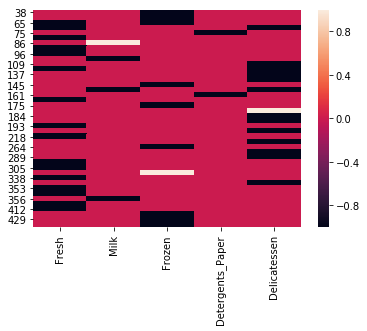

In [49]:
print(df.shape)

sns.set
# fig, axes = plt.subplots(1)
sns.heatmap(df)

[65, 66, 128, 154]


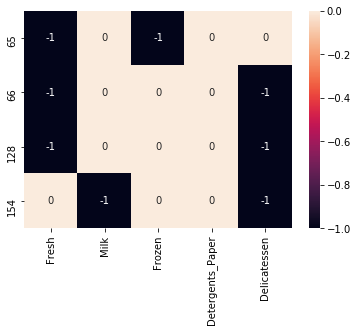

In [75]:
multi_out = []
for index, row in df.iterrows():
    tot = 0
    for key in df.keys():
        tot += abs(row[key])
    if tot > 1:
        multi_out.append(index)
        
print(multi_out)

sns.heatmap(df[df.index.isin(multi_out)], annot=True)

In [70]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers = multi_out

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [71]:
log_samples = log_samples.drop(columns=['Grocery'])

good_data.shape

KeyError: "['Grocery'] not found in axis"

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
Based on the heatmap we see that almost all the outliers are below the q1-step this surprises me. Due to the clustering of data around 0 - value in the initial analysis.
Following indices [65, 66, 128, 154] are outliers in 2 out of 5 categories. In all these categories we are below the lower range.

Intuitively I two marked data points above the outlier threshold - because in the initial data it seemed that some customers have spent much more money than the rest. But also, in the analysis if the values were significantly out of range I removed them. For outlier over the limit in Delicatessen I decided to keep it. Because most of the outliers were in the Fresh and Delicatessen categories. These are specific categories and it seemed that data points close to the limits can be included. For the very distant outliers I decided to remove them.

Fresh - this category is influenced if some consumers have their own garden, or they have access to fresh produce directly from farm. That's why I decided to keep group of consumers that spends less than calculated lower bound.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

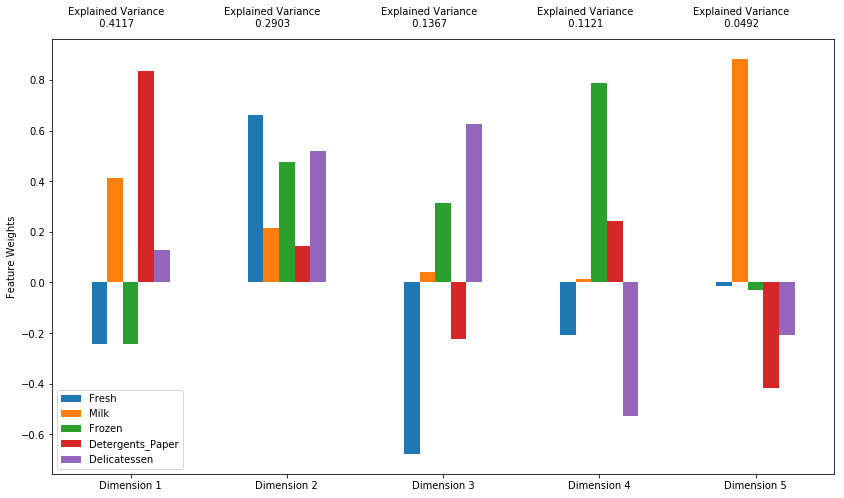

In [56]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=5).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
With Dimension1 0.4117 of variance is explained. With Dimension1 and 2 (0.4117 + 0.2903) = 0.702+ of variance is explained.

With Dimension 1 through 4 0.9508 is the total variance explained.

1st Dimension shows highest feature weight for with Detergents_Paper and Milk. Delicatessen are slightly positive but close to 0.1. Fresh and Frozen are negative slightly below -0.2.

2nd Dimension shows highest feature weight for Fresh and Delicatessen above 0.5. Frozen is high just below 0.5. Milk and Detergents paper is below 0.2.

3rd Dimension shows highest positive weight for feature Delicatessen above 0.6. High negative weight is on Fresh below -0.6. Frozen is positive with weight close to 0.4. Detergents_Paper is negative with -0.2 weight. Milk has slightly positive weight around 0.

4th Dimension shows highest positive weight for feature Frozen around 0.8. High negative weight is on Delicatessen less than -0.4. Detergents_Paper has positive weight close to 0.2. Fresh has negative weight around -0.2. Milk has almost 0 weight in this dimension.

If we stick with two dimensions we can represent data in plane. X-axis representing weighted 5 features based on the pca calculated weights in Dimension-1. Y-axis representing Dimension-2. Interesting in these two dimensions is that all features have relevant weights (not close to 0). It means that X and Y axis are correlated. Least X, Y correlated feature is Detergents_Paper. Since it has big weight in Dimension-1 and very small in Dimension-2. This also means that no pca feature vector has horizontal or vertical direction.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [57]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,2.5193,0.5484,0.2533,1.5608,0.1987
1,2.0788,1.0920,-1.1523,-1.6537,0.0066
2,2.0604,3.8174,1.0561,-0.5103,0.7539


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [58]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [59]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.5193,0.5484
1,2.0788,1.0920
2,2.0604,3.8174


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

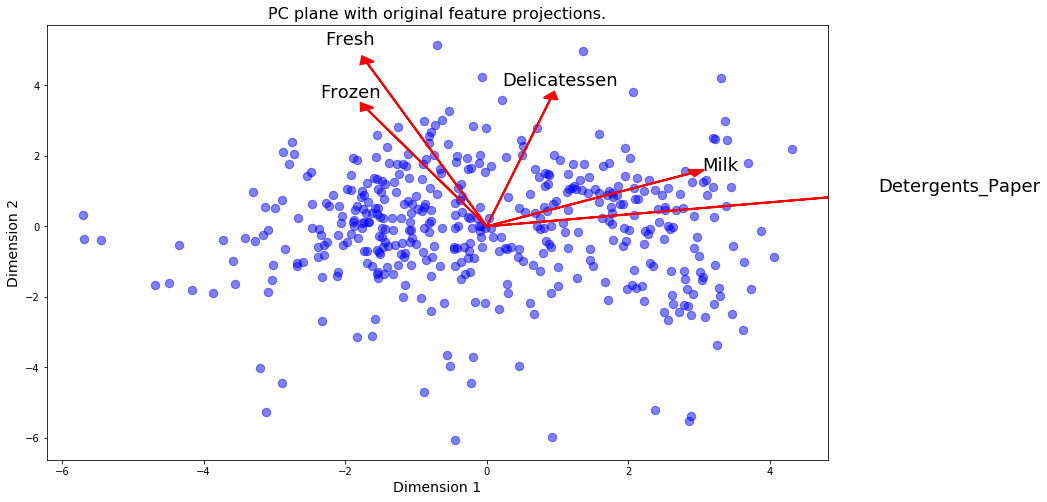

In [60]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
K-Means clustering is simple and fast algorithm. We use simple distance of points from the cluster center.

Gaussian Mixture enables more options of a class boundaries than K-Means. For Gaussian Mixture point can belong to multiple categories.

I think that K-Means is sufficient for this task since similarity of customers based on the simple distance reflects spending habits well. It is unclear if the data on the borders wouldn't be better classified by GMM, because data point can belong to multiple categories.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [61]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 
# clusterer = GMM(random_state=44).fit(reduced_data)
def clust(i):
    clusterer = KMeans(n_clusters=i, random_state=44).fit(reduced_data)
    # clusterer = GMM(random_state=44).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    # centers = clusterer.weights_
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, random_state=12)
    print('Number of clusters for K-Means {}, silhouette score {}'.format(i, score))
    
    return preds, centers, sample_preds, score

k_means_points_x = []
k_means_points_y = []
for i in range(2,12):
    _, _, _, score = clust(i)
    k_means_points_x.append(i)
    k_means_points_y.append(score)

/home/martin/virtualenvs/uda_cust2/local/lib/python2.7/site-packages/sklearn/neighbors/__init__.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .ball_tree import BallTree
/home/martin/virtualenvs/uda_cust2/local/lib/python2.7/site-packages/sklearn/neighbors/__init__.py:6: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility
  from .ball_tree import BallTree
/home/martin/virtualenvs/uda_cust2/local/lib/python2.7/site-packages/sklearn/neighbors/__init__.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .kd_tree import KDTree
/home/martin/virtualenvs/uda_cust2/local/lib/python2.7/site-packages/sklearn/neighbors/__init__.py:7: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility
  from .kd_tree import KDTree
/home/martin/virtualenvs/uda_cust2/local/lib/python2.7/site-packages/sklearn/utils/graph.py:17: RuntimeWarning: numpy.dtype size changed, may indicate b

Number of clusters for K-Means 2, silhouette score 0.404633472019
Number of clusters for K-Means 3, silhouette score 0.391408553835
Number of clusters for K-Means 4, silhouette score 0.347191209172
Number of clusters for K-Means 5, silhouette score 0.361944414443
Number of clusters for K-Means 6, silhouette score 0.364795835272
Number of clusters for K-Means 7, silhouette score 0.369208380803
Number of clusters for K-Means 8, silhouette score 0.353971841921
Number of clusters for K-Means 9, silhouette score 0.335671616125
Number of clusters for K-Means 10, silhouette score 0.342765570362
Number of clusters for K-Means 11, silhouette score 0.350110997631


In [62]:
def clust_gmm(i):
    # clusterer = KMeans(n_clusters=i, random_state=44).fit(reduced_data)
    clusterer = GMM(n_components=i, random_state=44).fit(reduced_data)
    # print(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # print(preds)

    # TODO: Find the cluster centers
    centers = clusterer.means_
    # centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    # print(len(sample_preds))

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, random_state=12)
    print('Number of clusters for GMM {}, silhouette score {}'.format(i, score))
    
    return preds, centers, sample_preds, score

gmm_points_x = []
gmm_points_y = []
for i in range(2,12):
    _, _, _, score = clust_gmm(i)
    gmm_points_x.append(i)
    gmm_points_y.append(score)

Number of clusters for GMM 2, silhouette score 0.395508602744
Number of clusters for GMM 3, silhouette score 0.389571008056
Number of clusters for GMM 4, silhouette score 0.317047040272
Number of clusters for GMM 5, silhouette score 0.333129505735
Number of clusters for GMM 6, silhouette score 0.290555389061
Number of clusters for GMM 7, silhouette score 0.299378414192
Number of clusters for GMM 8, silhouette score 0.291413847846
Number of clusters for GMM 9, silhouette score 0.267473000628
Number of clusters for GMM 10, silhouette score 0.310584435667
Number of clusters for GMM 11, silhouette score 0.275777145787


In [63]:
# preds, centers, sample_preds, score = clust_gmm(8)
preds, centers, sample_preds, score = clust(2)
display(sample_preds)

Number of clusters for K-Means 2, silhouette score 0.404633472019


array([1, 1, 1], dtype=int32)

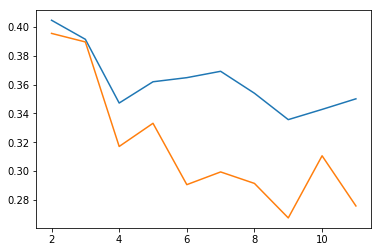

In [64]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)


# for i in range(1,15):
ax1.plot(k_means_points_x, k_means_points_y, label="K-Means")
ax1.plot(gmm_points_x, gmm_points_y, label="GMM")

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

Interestingly silhouette score is highest for number of clusters 2 for K-Means as well as GMM. Then second peak is around 7 clusters for K-Means and 5 clusters for GMM. This second peak is smaller than the first one.

The bigger the silhouette score the better it describes the clusters. I chose to cluster data into two categories based on the K-Means clustering.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

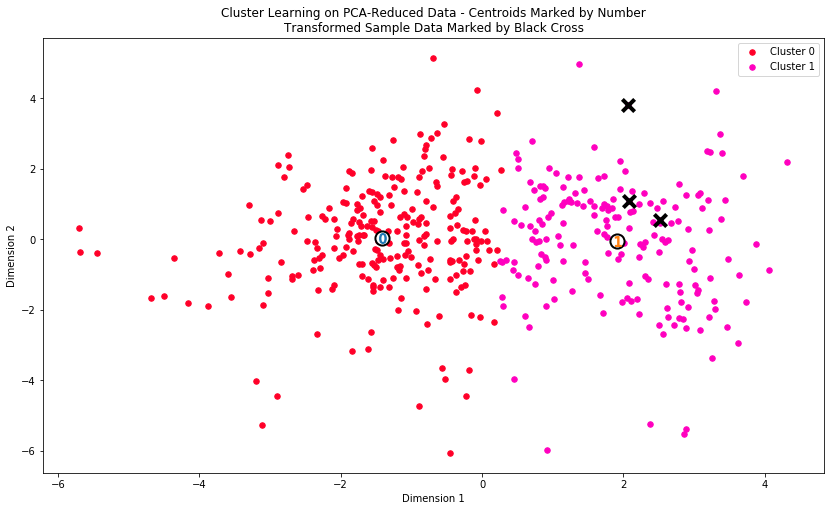

In [65]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [66]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(data.describe())
display(true_centers)

,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
Segment 0,9287.0,1903.0,2179.0,274.0,687.0
Segment 1,3910.0,7373.0,934.0,4352.0,1007.0


In [67]:
display(np.sum(true_centers, axis=1))

Segment 0    14330.0
Segment 1    17576.0
dtype: float64

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
Segment 0 is Grocery - segment. Grocery is the highest category. This customer shops in big shopping grocery store, where he buys a lot of groceries and Detergents_Paper. He shops in butchery for delicatessen. He visits fresh-market occasionally. "Grocery" customer spends about 85% more than segment "Fresh" spender. Which indicates that these shoppers are shopping for more people/higher quality produces.

Segment 1 is Fresh - segment. Fresh is the highest category. This customer is focused on fresh food. He visits fresh market most often. He does not spend much on grocery or detergents and paper. He visits grocery store less regularly than segment grocery customer.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [68]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 1)
('Sample point', 1, 'predicted to be in Cluster', 1)
('Sample point', 2, 'predicted to be in Cluster', 1)


**Answer:**
All my samples are in the cluster 0. We have only 2 clusters. One of my selecting criteria was big spender. It turns out they are all very similar in our current clustering.

My samples are irrelevant to the data after PCA. My original idea was to find bigger spenders but project went different way.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We have two clusters. We must select customers from both clusters. Based on the distribution we have to select customers randomly. Given that we know our features are normaly distributed we can select customers based on the normal distribution (normal in logarithic transformation). This way we can get representative sample of customers.

We could adapt customer selection if there are some groups of customers that are not important for company profit.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Now that we have clustered the data we have created labels for our input data. We can apply supervised learning.

Based on these labels we can train a classifier and classify the new customer using spending per category as inputs.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

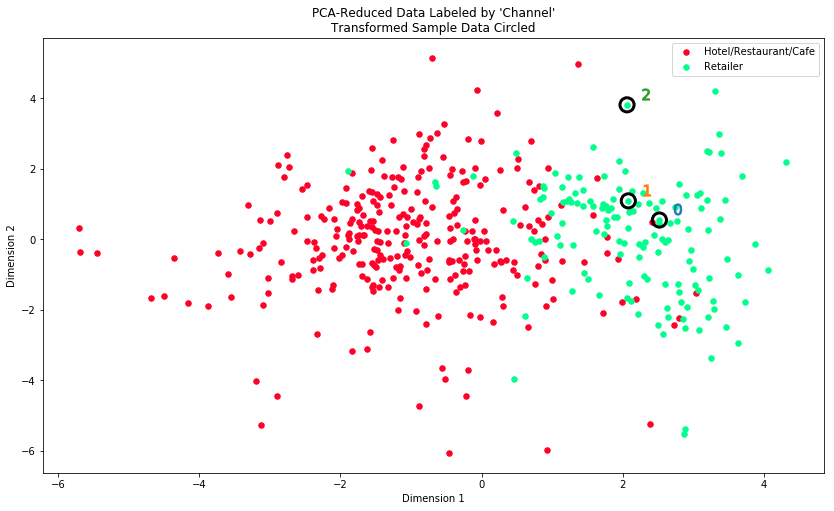

In [69]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

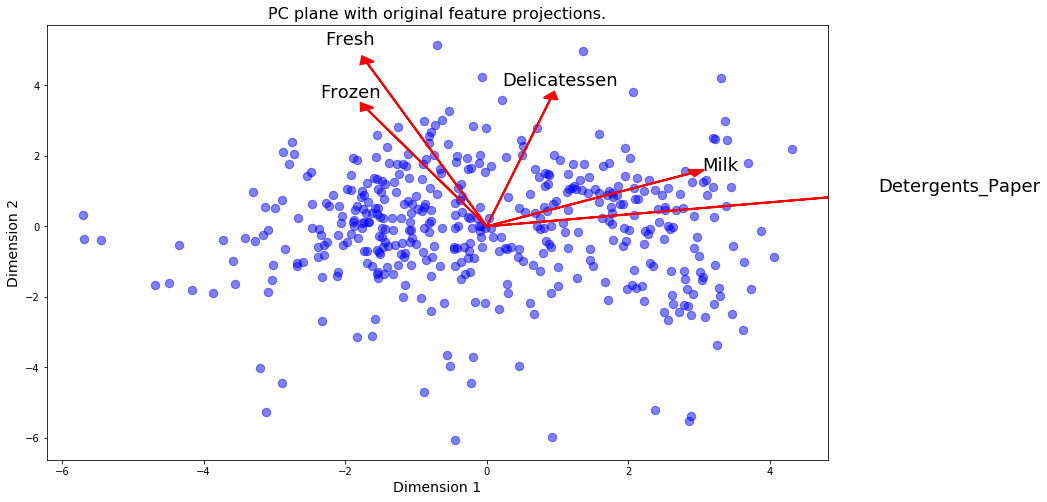

In [72]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

**Answer:**

I have correctly selected two clusters. I was missing the underlying story Fresh - can mean Hotel/Restaurant/Cafe. I thought that most of the money is spend in different Retailers.

Categories Fresh and Frozen are most correlated to the left side of the plot. These are more correlated, but no category is "very" correlated to the Hotel/Restaurant/Cafe. Since no vector in the plot above is pointing to the left.

I have made some correct assumptions especially for the Retailer customers. I missed that Fresh/Frozen category was reflecting "eating out" to some degree.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.